In [1]:
import pandas as pd
import numpy as np

In [2]:
df_in = pd.read_csv('insurance2.csv')

In [3]:
df_in.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [4]:
df_in.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [5]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [6]:
df_in.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [7]:
df_in['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [8]:
df_in['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

In [9]:
df_in['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [10]:
df_in['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [11]:
df_in['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [12]:
df_in.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [13]:
df_in = df_in[['charges','age', 'sex', 'bmi', 'children', 'smoker', 'region','insuranceclaim']]

In [14]:
df_in.corr()

,charges,age,sex,bmi,children,smoker,region,insuranceclaim
charges,1.000000,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,0.309418
age,0.299008,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.113723
sex,0.057292,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.031565
bmi,0.198341,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.384198
children,0.067998,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,-0.409526
smoker,0.787251,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.333261
region,-0.006208,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,0.020891
insuranceclaim,0.309418,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,1.000000


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

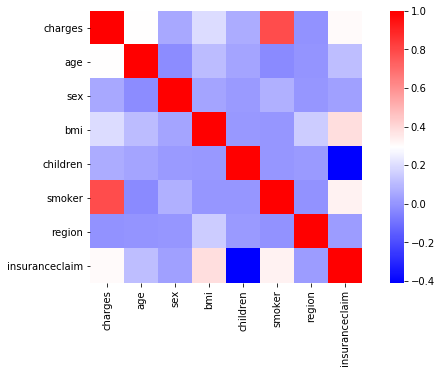

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(df_in.corr(), square=True, cmap='bwr')
plt.show()

<Figure size 1080x360 with 0 Axes>

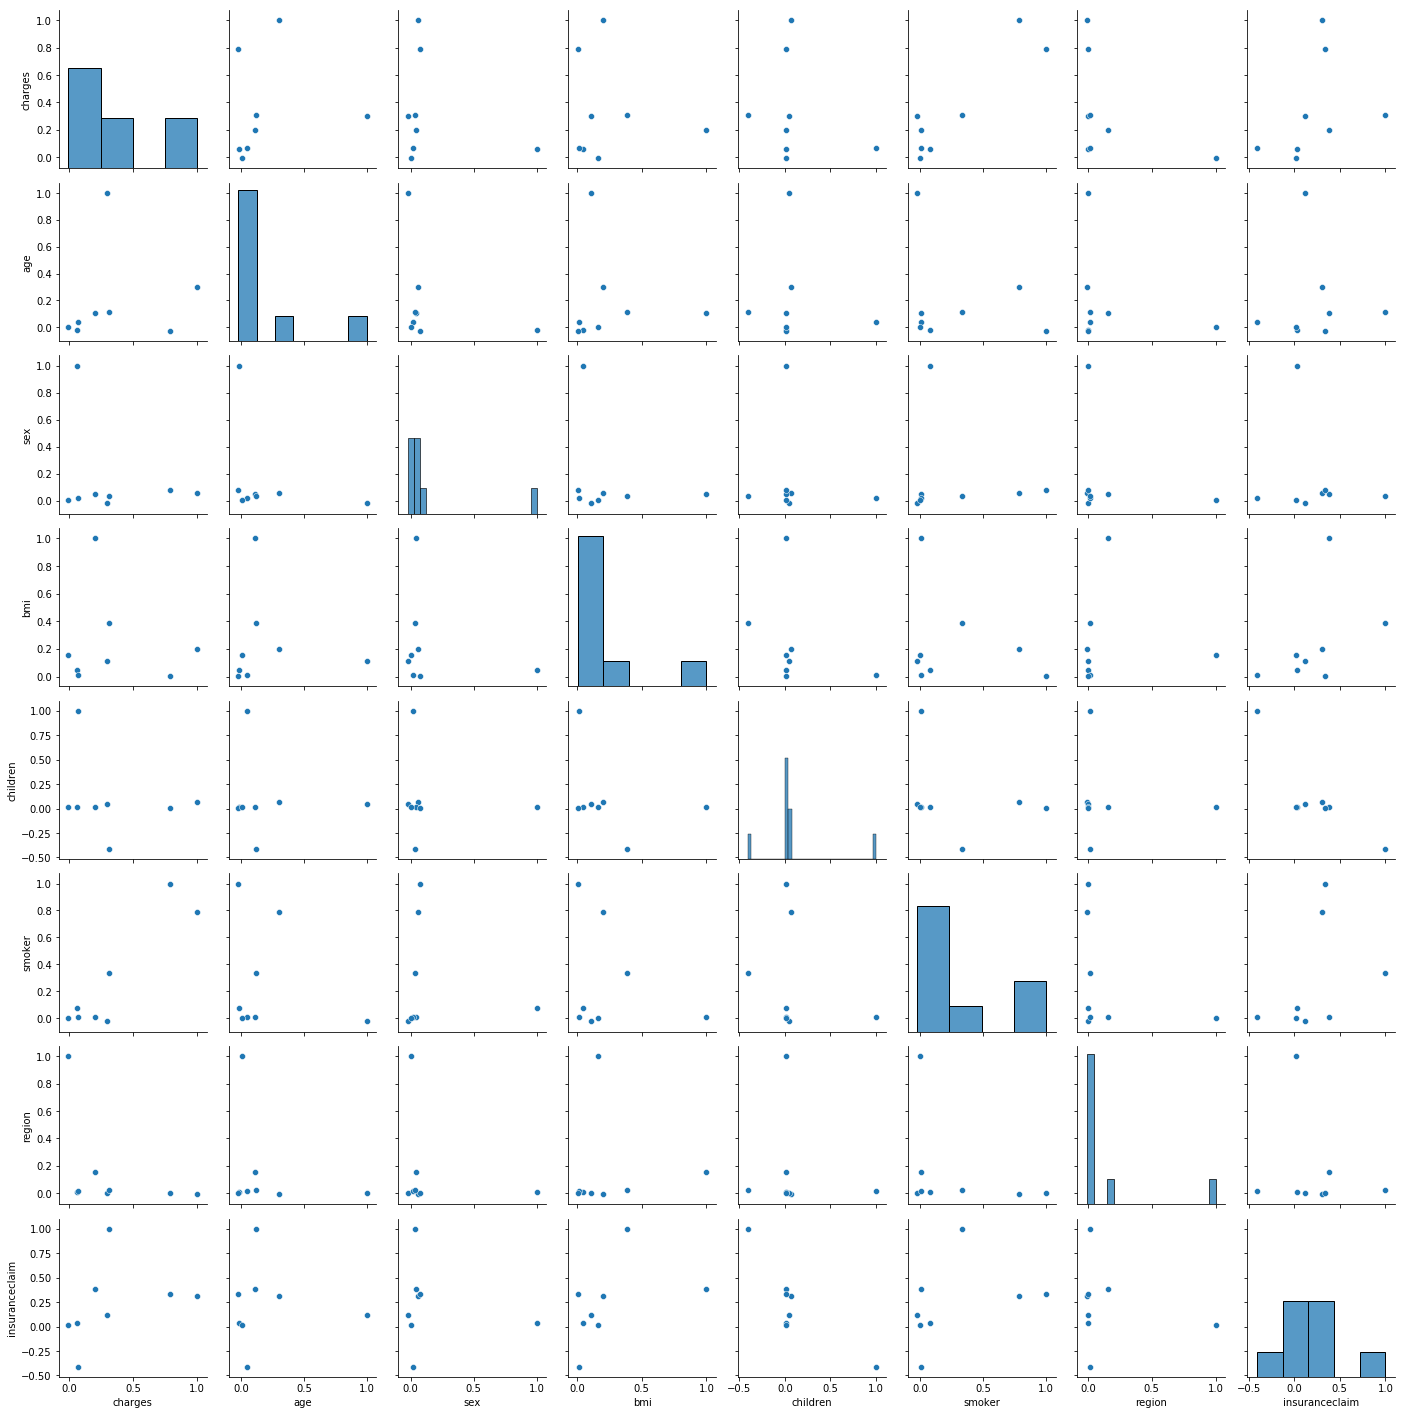

In [17]:
plt.figure(figsize=(15,5))
sns.pairplot(data=df_in.corr())
plt.show()

## Observation:

### by looking at te Heatmap and the pairplots, we can clearly see that
    ## Sex, Children,bmi and region has almost zero corelation with the charges
    ## major features afecting the cost/chanrges is smoker
    ## age and insurance calim has some impact on the charges


In [18]:
# Normalizing the inputs

In [19]:
df_in.head()

,charges,age,sex,bmi,children,smoker,region,insuranceclaim
0,16884.92400,19,0,27.900,0,1,3,1
1,1725.55230,18,1,33.770,1,0,2,1
2,4449.46200,28,1,33.000,3,0,2,0
3,21984.47061,33,1,22.705,0,0,1,0
4,3866.85520,32,1,28.880,0,0,1,1


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
df_in_scaler = StandardScaler()

In [22]:
df_in[['age','bmi','children','region']] = df_in_scaler.fit_transform(df_in[['age','bmi','children','region']])
df_in.head()

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,charges,age,sex,bmi,children,smoker,region,insuranceclaim
0,16884.92400,-1.438764,0,-0.453320,-0.908614,1,1.343905,1
1,1725.55230,-1.509965,1,0.509621,-0.078767,0,0.438495,1
2,4449.46200,-0.797954,1,0.383307,1.580926,0,0.438495,0
3,21984.47061,-0.441948,1,-1.305531,-0.908614,0,-0.466915,0
4,3866.85520,-0.513149,1,-0.292556,-0.908614,0,-0.466915,1


In [23]:
# building the model

In [24]:
import statsmodels.formula.api as smf

In [25]:
sm_df_in_model  = smf.ols(formula = 'charges~ smoker + age +insuranceclaim + sex+ children + bmi + region', data=df_in).fit()
sm_df_in_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     578.3
Date:                Tue, 14 Sep 2021   Prob (F-statistic):               0.00
Time:                        22:05:28   Log-Likelihood:                -13543.
No. Observations:                1338   AIC:                         2.710e+04
Df Residuals:                    1330   BIC:                         2.714e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9190.9641    333.138     27.589      0.000    8537.431    9844.497
smoker          2.442e+04    450.110     54.257      0.000    2.35e+04    2.53e+04
age             3684.1336    167.746     21.963      0.000    3355.059    4013.208
insuranceclaim -1458.7404    448.606     -3.252      0.001   -2338.794    -578.687
sex             -134.6896    331.622     -0.406      0.685    -785.249     515.870
children         275.3737    189.624      1.452      0.147     -96.622     647.369
bmi             2302.3689    188.439     12.218      0.000    1932.699    2672.039
region          -413.5136    167.347     -2.471      0.014    -741.807     -85.221
==============================================================================
Omnibus:                      293.974   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              690.125
Skew:                           1.194   Prob(JB):                    1.38e-150
Kurtosis:                       5.583   Cond. No.                         4.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# from the above model Smoker, and Age has the greater impact on the insurance cost

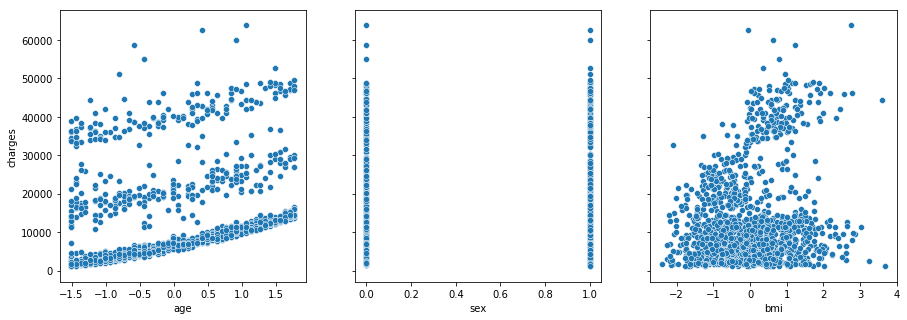

In [26]:
fig,axs = plt.subplots(1,3,sharey=True, figsize=(15,5))
sns.scatterplot(data=df_in, x='age', y='charges', ax=axs[0])
sns.scatterplot(data=df_in, x='sex', y='charges',ax=axs[1])
sns.scatterplot(data=df_in, x='bmi', y='charges',ax=axs[2])
plt.show()

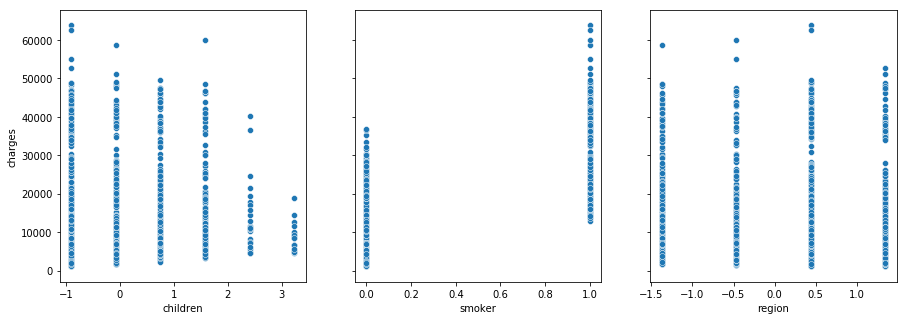

In [27]:
fig,axs = plt.subplots(1,3,sharey=True, figsize=(15,5))
sns.scatterplot(data=df_in, x='children', y='charges', ax=axs[0])
sns.scatterplot(data=df_in, x='smoker', y='charges',ax=axs[1])
sns.scatterplot(data=df_in, x='region', y='charges',ax=axs[2])
plt.show()

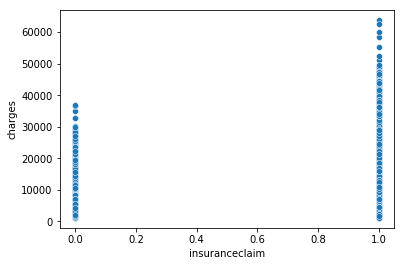

In [28]:
sns.scatterplot(data=df_in, x='insuranceclaim', y='charges')
plt.show()

In [29]:
X= df_in.drop(['charges'],axis=1)
y= df_in[['charges']]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=42)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
df_in_model = LinearRegression()

In [33]:
df_in_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
y_pred_train = df_in_model.predict(X_train)

In [35]:
y_pred_train

array([[13686.07220011],
       [ 7671.17363171],
       [13770.32813607],
       [36638.98471529],
       [34068.68719181],
       [35946.92336274],
       [ 6640.15629165],
       [ 5480.59200768],
       [17540.81546584],
       [ 8595.15207797],
       [38697.25208204],
       [ 4435.78342271],
       [ 8755.24480147],
       [ 9913.82462333],
       [30068.00114287],
       [ 5132.44137157],
       [ 2746.28164867],
       [16934.36496756],
       [ 3952.87132135],
       [ 6927.55340576],
       [ 9862.44601631],
       [ -744.28871644],
       [30132.4317349 ],
       [ 8745.42005898],
       [10544.29264448],
       [ 5263.03465675],
       [ 8018.4816954 ],
       [10461.11130627],
       [28435.77592643],
       [ 8581.87844458],
       [10316.27164281],
       [ 5977.15717062],
       [ 4061.26669568],
       [ 1226.44645323],
       [ 8678.43737628],
       [10590.90933718],
       [10852.34570181],
       [ 8797.60394208],
       [ 6270.12492929],
       [ 3823.03416827],


In [36]:
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
print(r2_score(y_pred= y_pred_train, y_true = y_train))
print(np.sqrt(mean_squared_error(y_pred= y_pred_train, y_true = y_train)))

0.7443935414225542
6118.681827376069


In [38]:
y_pred_test = df_in_model.predict(X_test)

In [39]:
print(r2_score(y_pred= y_pred_test, y_true = y_test))
print(np.sqrt(mean_squared_error(y_pred= y_pred_test, y_true = y_test)))

0.7709743113284253
5794.88853140811


In [40]:
# ridge regresion

from sklearn.linear_model import Ridge

Ridgereg = Ridge(alpha=0.001, normalize=True)

Ridgereg.fit(X_train,y_train)

pred_train_ridge=Ridgereg.predict(X_train)
pred_test_ridge=Ridgereg.predict(X_test)

print(np.sqrt(mean_squared_error(pred_train_ridge,y_train)))
print(np.sqrt(mean_squared_error(pred_test_ridge,y_test)))
Ridgereg.score(X_test,y_test)

6118.696030756459
5794.89778513408


0.7709735798759931

In [41]:
# lasso regresion

from sklearn.linear_model import Lasso

Lassoreg = Lasso(alpha=0.001, normalize=True)

Lassoreg.fit(X_train,y_train)

pred_train_lasso=Lassoreg.predict(X_train)
pred_test_lasso=Lassoreg.predict(X_test)

print(np.sqrt(mean_squared_error(pred_train_lasso,y_train)))
print(np.sqrt(mean_squared_error(pred_test_lasso,y_test)))
Lassoreg.score(X_test,y_test)

6118.681828153133
5794.8851067461


0.7709745820274523

In [42]:
from sklearn.linear_model import ElasticNet


Elasreg = ElasticNet(alpha=0.001, normalize=True)

Elasreg.fit(X_train,y_train)

pred_train_Elas=Elasreg.predict(X_train)
pred_test_Elas=Elasreg.predict(X_test)

print(np.sqrt(mean_squared_error(pred_train_Elas,y_train)))
print(np.sqrt(mean_squared_error(pred_test_Elas,y_test)))
Elasreg.score(X_test,y_test)


7026.697936182537
6829.950612864106


0.6818520336488385

In [43]:
#Results:

# from the above model Smoker, and Age has the greater impact on the insurance cost
# Using various linear regresiion, we get an r2_score of 77% and RMSe of 5795

In [44]:
#Visualize how your model uses the different features and which features have a greater effect.

In [45]:
df_in.head()

,charges,age,sex,bmi,children,smoker,region,insuranceclaim
0,16884.92400,-1.438764,0,-0.453320,-0.908614,1,1.343905,1
1,1725.55230,-1.509965,1,0.509621,-0.078767,0,0.438495,1
2,4449.46200,-0.797954,1,0.383307,1.580926,0,0.438495,0
3,21984.47061,-0.441948,1,-1.305531,-0.908614,0,-0.466915,0
4,3866.85520,-0.513149,1,-0.292556,-0.908614,0,-0.466915,1


In [46]:
coeff_1  = list(df_in_model.coef_[0])
coeff_1

[3758.9039323849206,
 114.41692172035894,
 2396.5256286667227,
 201.2301656809181,
 24273.480192626852,
 -394.9436917204082,
 -1523.4192944045428]

In [47]:
features_1 = df_in.columns
features_1=features_1[1:8]
features_1

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'insuranceclaim'], dtype='object')

In [48]:
df_importance_1 = pd.DataFrame(coeff_1, features_1)
df_importance_1.reset_index(inplace=True)
df_importance_1.rename(columns={'index':'features', 0:'importance'}, inplace = True)

In [49]:
df_importance_1

,features,importance
0,age,3758.903932
1,sex,114.416922
2,bmi,2396.525629
3,children,201.230166
4,smoker,24273.480193
5,region,-394.943692
6,insuranceclaim,-1523.419294


In [50]:
df_importance_1['positive'] = df_importance_1['importance'] >0

In [51]:
df_importance_1.sort_values(by=['positive','importance'], ascending=[True, True], inplace=True)
df_importance_1.set_index('features', inplace=True)
df_importance_1

,importance,positive
features,,
insuranceclaim,-1523.419294,False
region,-394.943692,False
sex,114.416922,True
children,201.230166,True
bmi,2396.525629,True
age,3758.903932,True
smoker,24273.480193,True


Text(0.5, 0, 'Importance')

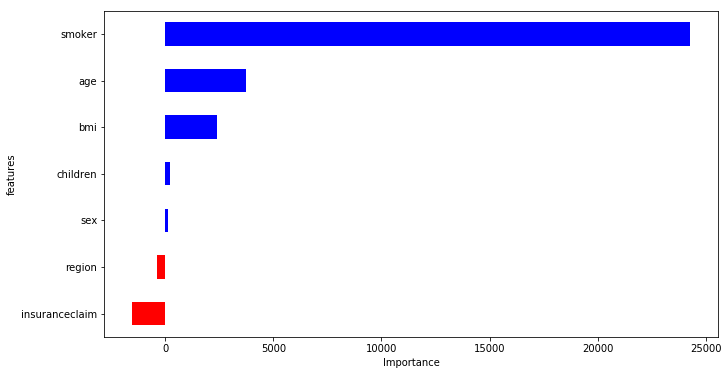

In [52]:
df_importance_1.importance.plot(kind='barh', figsize=(11, 6),color = df_importance_1.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

# results:
###  from the above model Smoker, and Age has the greater impact on the insurance cost

# Model for InsuranceClaim

In [53]:
df_in.head()

,charges,age,sex,bmi,children,smoker,region,insuranceclaim
0,16884.92400,-1.438764,0,-0.453320,-0.908614,1,1.343905,1
1,1725.55230,-1.509965,1,0.509621,-0.078767,0,0.438495,1
2,4449.46200,-0.797954,1,0.383307,1.580926,0,0.438495,0
3,21984.47061,-0.441948,1,-1.305531,-0.908614,0,-0.466915,0
4,3866.85520,-0.513149,1,-0.292556,-0.908614,0,-0.466915,1


In [54]:
df_in.corr()

,charges,age,sex,bmi,children,smoker,region,insuranceclaim
charges,1.000000,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,0.309418
age,0.299008,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.113723
sex,0.057292,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.031565
bmi,0.198341,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.384198
children,0.067998,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,-0.409526
smoker,0.787251,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.333261
region,-0.006208,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,0.020891
insuranceclaim,0.309418,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,1.000000


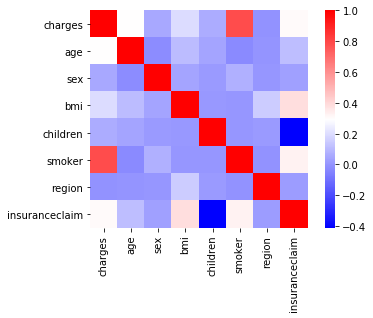

In [55]:
sns.heatmap(df_in.corr(), square=True, cmap='bwr')

# Observations:
    # as per the correlation heatmap, we can see that sex, region and age are having a very weak corelation with insurance calaim
    # children s have a negative corelation, which indiates that more children means less or no policy claim
    # charges, smoker and bmi shows postive corelation which means the policy claims increse with the increase in these features



In [56]:
X_1 = df_in.drop(['insuranceclaim'], axis=1)
X_1.head()

,charges,age,sex,bmi,children,smoker,region
0,16884.92400,-1.438764,0,-0.453320,-0.908614,1,1.343905
1,1725.55230,-1.509965,1,0.509621,-0.078767,0,0.438495
2,4449.46200,-0.797954,1,0.383307,1.580926,0,0.438495
3,21984.47061,-0.441948,1,-1.305531,-0.908614,0,-0.466915
4,3866.85520,-0.513149,1,-0.292556,-0.908614,0,-0.466915


In [57]:
y_1 = df_in[['insuranceclaim']]
y_1.head()

,insuranceclaim
0,1
1,1
2,0
3,0
4,1


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [60]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,y_1,train_size=0.7, random_state=1234)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [61]:
InsuranceClaim_Model = LogisticRegression()

In [62]:
InsuranceClaim_Model.fit(X_1_train,y_1_train)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
y_1_pred_train= InsuranceClaim_Model.predict(X_1_train)
y_1_pred_train

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [64]:
y_1_prob_train= InsuranceClaim_Model.predict_proba(X_1_train)
y_1_prob_train

array([[0.05626059, 0.94373941],
       [0.66076272, 0.33923728],
       [0.26874972, 0.73125028],
       ...,
       [0.49920131, 0.50079869],
       [0.27701283, 0.72298717],
       [0.34749917, 0.65250083]])

In [65]:
confusion_matrix(y_pred=y_1_pred_train, y_true=y_1_train)

array([[235, 144],
       [ 39, 518]], dtype=int64)

In [66]:
(235+518)/(235+144+39+518)

0.8044871794871795

In [67]:
print(accuracy_score(y_pred=y_1_pred_train, y_true=y_1_train))
print(precision_score(y_pred=y_1_pred_train, y_true=y_1_train))
print(recall_score(y_pred=y_1_pred_train, y_true=y_1_train))

0.8044871794871795
0.7824773413897281
0.9299820466786356


In [68]:
print(classification_report(y_pred=y_1_pred_train, y_true=y_1_train))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72       379
           1       0.78      0.93      0.85       557

   micro avg       0.80      0.80      0.80       936
   macro avg       0.82      0.78      0.78       936
weighted avg       0.81      0.80      0.80       936



In [69]:
y_1_pred_test = InsuranceClaim_Model.predict(X_1_test)
y_1_pred_test

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,

In [70]:
y_1_prob_test = InsuranceClaim_Model.predict_proba(X_1_test)
y_1_prob_test

array([[0.51101907, 0.48898093],
       [0.61107494, 0.38892506],
       [0.41075147, 0.58924853],
       [0.44004535, 0.55995465],
       [0.07430648, 0.92569352],
       [0.19611822, 0.80388178],
       [0.270756  , 0.729244  ],
       [0.34474404, 0.65525596],
       [0.08340169, 0.91659831],
       [0.51929938, 0.48070062],
       [0.33296946, 0.66703054],
       [0.33653142, 0.66346858],
       [0.12194445, 0.87805555],
       [0.16344246, 0.83655754],
       [0.5123597 , 0.4876403 ],
       [0.70434443, 0.29565557],
       [0.42766109, 0.57233891],
       [0.23784697, 0.76215303],
       [0.19084007, 0.80915993],
       [0.41559379, 0.58440621],
       [0.20587179, 0.79412821],
       [0.49245759, 0.50754241],
       [0.26432482, 0.73567518],
       [0.72622707, 0.27377293],
       [0.64307273, 0.35692727],
       [0.43131561, 0.56868439],
       [0.19213794, 0.80786206],
       [0.03809276, 0.96190724],
       [0.25455156, 0.74544844],
       [0.28018168, 0.71981832],
       [0.

In [71]:
print(accuracy_score(y_pred=y_1_pred_test, y_true=y_1_test))
print(precision_score(y_pred=y_1_pred_test, y_true=y_1_test))
print(recall_score(y_pred=y_1_pred_test, y_true=y_1_test))

0.7810945273631841
0.7464285714285714
0.9247787610619469


In [72]:
print(classification_report(y_pred=y_1_pred_test, y_true=y_1_test))

              precision    recall  f1-score   support

           0       0.86      0.60      0.70       176
           1       0.75      0.92      0.83       226

   micro avg       0.78      0.78      0.78       402
   macro avg       0.80      0.76      0.77       402
weighted avg       0.80      0.78      0.77       402



# Observation:
    #prediction results is hitting 78% accuracy


In [73]:
#Visualize how your model uses the different features and which features have a greater effect.

In [74]:
InsuranceClaim_Model.coef_

array([[ 5.86215481e-05,  4.31129192e-02, -2.03792149e-02,
         5.37574262e-01, -7.02022613e-01,  9.91577681e-02,
         4.56221510e-02]])

In [75]:
InsuranceClaim_Model.intercept_

array([-0.14919909])

In [76]:
df_in.corr()

,charges,age,sex,bmi,children,smoker,region,insuranceclaim
charges,1.000000,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,0.309418
age,0.299008,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.113723
sex,0.057292,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.031565
bmi,0.198341,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.384198
children,0.067998,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,-0.409526
smoker,0.787251,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.333261
region,-0.006208,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,0.020891
insuranceclaim,0.309418,0.113723,0.031565,0.384198,-0.409526,0.333261,0.020891,1.000000


In [77]:
coeff= list(InsuranceClaim_Model.coef_[0])
coeff

[5.862154814685306e-05,
 0.043112919210255424,
 -0.020379214942318015,
 0.5375742621562051,
 -0.702022612780083,
 0.09915776810628518,
 0.04562215104675707]

In [78]:
features=list(df_in.columns)
features=features[0:7]
features

['charges', 'age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [79]:
type(features[0:6])

list

In [80]:
type(coeff)

list

In [81]:
df_importance = pd.DataFrame(coeff, features)
df_importance.reset_index(inplace=True)
df_importance.rename(columns={'index':'features', 0:'importance'}, inplace = True)

In [82]:
df_importance.sort_values(by=['features'], ascending=True, inplace=True)


In [83]:
df_importance

,features,importance
1,age,0.043113
3,bmi,0.537574
0,charges,0.000059
4,children,-0.702023
6,region,0.045622
2,sex,-0.020379
5,smoker,0.099158


In [84]:
df_importance['positive'] = df_importance['importance'] > 0

In [85]:
df_importance

,features,importance,positive
1,age,0.043113,True
3,bmi,0.537574,True
0,charges,0.000059,True
4,children,-0.702023,False
6,region,0.045622,True
2,sex,-0.020379,False
5,smoker,0.099158,True


In [86]:
df_importance.set_index('features', inplace=True)

In [87]:
df_importance.sort_values(by=['positive','importance'], ascending=[True,True], inplace=True)
df_importance

,importance,positive
features,,
children,-0.702023,False
sex,-0.020379,False
charges,0.000059,True
age,0.043113,True
region,0.045622,True
smoker,0.099158,True
bmi,0.537574,True


Text(0.5, 0, 'Importance')

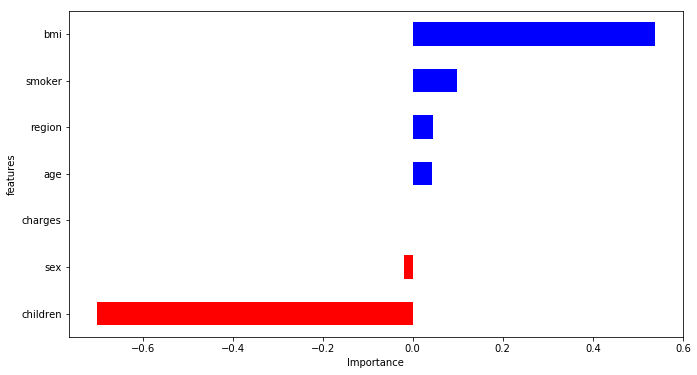

In [88]:
df_importance.importance.plot(kind='barh', figsize=(11, 6),color = df_importance.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

# results:
###  from the above model Children, and bmi has the greater impact on the insurance claim